City of Los Angeles crime data from 2020 to current date

### Problem statement: Find out the area where the crime rate is higher and where the los angeles coup should priortize highly

In [1749]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [1750]:
df = pd.read_csv("/Users/mrbinit/Downloads/Crime_Data_from_2020_to_Present.csv")

In [1751]:
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [1752]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [1753]:
df.shape

(770787, 28)

In [1754]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770787 entries, 0 to 770786
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           770787 non-null  int64  
 1   Date Rptd       770787 non-null  object 
 2   DATE OCC        770787 non-null  object 
 3   TIME OCC        770787 non-null  int64  
 4   AREA            770787 non-null  int64  
 5   AREA NAME       770787 non-null  object 
 6   Rpt Dist No     770787 non-null  int64  
 7   Part 1-2        770787 non-null  int64  
 8   Crm Cd          770787 non-null  int64  
 9   Crm Cd Desc     770787 non-null  object 
 10  Mocodes         664916 non-null  object 
 11  Vict Age        770787 non-null  int64  
 12  Vict Sex        669964 non-null  object 
 13  Vict Descent    669958 non-null  object 
 14  Premis Cd       770778 non-null  float64
 15  Premis Desc     770334 non-null  object 
 16  Weapon Used Cd  268001 non-null  float64
 17  Weapon Des

In [1755]:
# Assuming you have a DataFrame called 'df' with the original column names
original_columns = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
                   'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
                   'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
                   'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
                   'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
                   'LON']

# New column names you want to set
new_columns = ['DR_NUMBER', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area', 'Area_Name',
               'Report_District_Number', 'Part_Type', 'Crime_Code', 'Crime_Description', 'Modcodes',
               'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premises_Code', 'Premises_Description',
               'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Code_1',
               'Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Location', 'Cross_Street', 'Latitude',
               'Longitude']

# Rename the columns
df.columns = new_columns

In [1756]:
df.head(10)

,DR_NUMBER,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Code,Crime_Description,...,Status,Status_Description,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,Latitude,Longitude
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [1757]:
df.Modcodes.value_counts()

Modcodes
0344                             31796
0329                             17462
1822 0344                         9166
1501                              7688
0344 1822                         6550
                                 ...  
0421 0913 1814 1300                  1
0945 0344 0325 0416 0444             1
0913 2000 0906 1816 0444 0408        1
0400 0444 1300 2004 1822             1
0601 0445 0416 0359                  1
Name: count, Length: 258897, dtype: int64

In [1758]:
df = df.drop(['DR_NUMBER', 'Status', 'Status_Description','Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported', 'Crime_Code', 'Victim_Sex', 'Premises_Code','Weapon_Used_Code','Victim_Age', 'Location'], axis = 1)

In [1759]:
df.head(10)

,Date_Occurred,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Modcodes,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1
0,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,0444 0913,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0
1,01/01/2020 12:00:00 AM,330,1,Central,163,2,BATTERY - SIMPLE ASSAULT,0416 1822 1414,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0
2,02/13/2020 12:00:00 AM,1200,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,X,POLICE FACILITY,NaN,845.0
3,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0
4,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,BEAUTY SUPPLY STORE,NaN,740.0
5,01/01/2020 12:00:00 AM,30,1,Central,163,1,"RAPE, FORCIBLE",0413 1822 1262 1415,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0
6,01/02/2020 12:00:00 AM,1315,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,H,DEPARTMENT STORE,NaN,442.0
7,01/04/2020 12:00:00 AM,40,1,Central,155,2,OTHER MISCELLANEOUS CRIME,1402 0392,X,POLICE FACILITY,NaN,946.0
8,01/04/2020 12:00:00 AM,200,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0
9,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1300 0202 0378 0325,X,OTHER BUSINESS,NaN,341.0


In [1760]:

from datetime import datetime

def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time), '%H%M')
        regular_time = military_time_obj.strftime('%Y-%m-%d %H:%M:%S')
        return regular_time
    except ValueError:
        return military_time

# Convert military times to regular times in the Time_Occurred column
df['Date_Occurred'] = df['Date_Occurred'].apply(military_to_regular_time)
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])
df['Mnth'] = df['Date_Occurred'].dt.month
df['Day_of_week'] = df['Date_Occurred'].dt.day_name()



/var/folders/_7/q65t_5bs3653ct73dh3s10w00000gn/T/ipykernel_44505/3571419508.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])


In [1761]:
df = df.drop('Date_Occurred', axis = 1)

### Converting military time

In [1762]:
from datetime import datetime

def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time), '%H%M')
        regular_time = military_time_obj.strftime('%H:%M')
        return regular_time
    except ValueError:
        return military_time


# Convert military times to regular times in the Time_Occurred column
df['Time_Occurred'] = df['Time_Occurred'].apply(military_to_regular_time)

In [1763]:
df.Time_Occurred.head(10)

0    22:30
1    03:30
2    12:00
3    17:30
4    04:15
5    03:00
6    13:15
7    04:00
8    20:00
9    19:25
Name: Time_Occurred, dtype: object

### Handling month

In [1764]:
def month_name(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'

df['Month'] = df['Mnth'].apply(month_name)


In [1765]:
df = df.drop('Mnth', axis = 1)

In [1766]:

# # Plot crime occurrences by month
# plt.figure(figsize=(10, 6))
# sns.countplot(x='Month', data= df)
# plt.xlabel('Month')
# plt.ylabel('Number of Crimes')
# plt.title('Monthly Crime Occurrences')
# plt.show()


# # Plot crime occurrences by day of the week
# plt.figure(figsize=(10, 6))
# sns.countplot(x='Day_of_week', data= df)
# plt.xlabel('Day of the Week')
# plt.ylabel('Number of Crimes')
# plt.title('Daily Crime Occurrences')
# plt.show()


In [1767]:
# df.Date_Occurred.head(10)

In [1768]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Modcodes,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,0444 0913,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,0416 1822 1414,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,X,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",0413 1822 1262 1415,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,1402 0392,X,POLICE FACILITY,NaN,946.0,Saturday,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1300 0202 0378 0325,X,OTHER BUSINESS,NaN,341.0,Tuesday,May


In [1769]:
df.Crime_Description.value_counts()

Crime_Description
VEHICLE - STOLEN                                           82396
BATTERY - SIMPLE ASSAULT                                   61108
THEFT OF IDENTITY                                          49522
BURGLARY FROM VEHICLE                                      47450
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    47210
                                                           ...  
PICKPOCKET, ATTEMPT                                            3
GRAND THEFT / AUTO REPAIR                                      3
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

In [1770]:
df.Weapon_Description.value_counts()

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    143872
UNKNOWN WEAPON/OTHER WEAPON                        27958
VERBAL THREAT                                      19672
HAND GUN                                           16645
SEMI-AUTOMATIC PISTOL                               6101
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [1771]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Modcodes,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,0444 0913,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,0416 1822 1414,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,X,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",0413 1822 1262 1415,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,1402 0392,X,POLICE FACILITY,NaN,946.0,Saturday,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1300 0202 0378 0325,X,OTHER BUSINESS,NaN,341.0,Tuesday,May


In [1772]:

df.columns[df.isin(['X']).any()]

Index(['Victim_Descent'], dtype='object')

In [1773]:
df = df.replace("X", np.nan)
df.columns[df.isin(['X']). any()]


Index([], dtype='object')

In [1774]:
df.head()

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Modcodes,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,0444 0913,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,0416 1822 1414,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,NaN,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,NaN,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan


In [1775]:
df.Area.value_counts()

Area
1     51734
12    48756
14    45097
3     42996
6     41066
18    39480
20    39024
13    38409
15    38326
7     36469
2     35766
8     35433
11    33290
9     32756
10    32240
5     31962
17    31241
21    31230
19    30694
4     28947
16    25871
Name: count, dtype: int64

In [1776]:
df.Area_Name.value_counts()

Area_Name
Central        51734
77th Street    48756
Pacific        45097
Southwest      42996
Hollywood      41066
Southeast      39480
Olympic        39024
Newton         38409
N Hollywood    38326
Wilshire       36469
Rampart        35766
West LA        35433
Northeast      33290
Van Nuys       32756
West Valley    32240
Harbor         31962
Devonshire     31241
Topanga        31230
Mission        30694
Hollenbeck     28947
Foothill       25871
Name: count, dtype: int64

In [1777]:
df.Report_District_Number.value_counts()

Report_District_Number
162     4108
645     3887
182     3638
1494    3437
646     3367
        ... 
697        1
945        1
728        1
226        1
1046       1
Name: count, Length: 1199, dtype: int64

In [1778]:
df.Part_Type.value_counts()

Part_Type
1    450833
2    319954
Name: count, dtype: int64

In [1779]:
df.Crime_Description.value_counts()

Crime_Description
VEHICLE - STOLEN                                           82396
BATTERY - SIMPLE ASSAULT                                   61108
THEFT OF IDENTITY                                          49522
BURGLARY FROM VEHICLE                                      47450
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    47210
                                                           ...  
PICKPOCKET, ATTEMPT                                            3
GRAND THEFT / AUTO REPAIR                                      3
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

In [1780]:
df.Victim_Descent.value_counts()

Victim_Descent
H    236645
W    157945
B    110452
O     61052
A     16826
K      4093
F      3217
C      2908
J      1076
V       777
I       739
Z       385
P       209
U       158
D        54
G        51
L        48
S        44
-         2
Name: count, dtype: int64

In [1781]:
df.Premises_Description.value_counts()

Premises_Description
STREET                                          194193
SINGLE FAMILY DWELLING                          130927
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     94852
PARKING LOT                                      54444
OTHER BUSINESS                                   36063
                                                 ...  
MTA - SILVER LINE - DOWNTOWN STREET STOPS            2
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
DEPT OF DEFENSE FACILITY                             1
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: count, Length: 306, dtype: int64

In [1782]:
df.Weapon_Description.value_counts()

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    143872
UNKNOWN WEAPON/OTHER WEAPON                        27958
VERBAL THREAT                                      19672
HAND GUN                                           16645
SEMI-AUTOMATIC PISTOL                               6101
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [1783]:
df.Crime_Code_1.value_counts()

Crime_Code_1
510.0    82387
624.0    61385
354.0    49532
330.0    47493
740.0    47299
         ...  
452.0        3
430.0        2
884.0        2
445.0        2
882.0        1
Name: count, Length: 140, dtype: int64

In [1784]:
df.columns

Index(['Time_Occurred', 'Area', 'Area_Name', 'Report_District_Number',
       'Part_Type', 'Crime_Description', 'Modcodes', 'Victim_Descent',
       'Premises_Description', 'Weapon_Description', 'Crime_Code_1',
       'Day_of_week', 'Month'],
      dtype='object')

In [1785]:
df.shape

(770787, 13)

### 

In [1786]:
a = len(df.index)/9240
print(a)

83.4185064935065


In [1787]:
# round(df.isnull().sum()/len(df.index),2)

In [1788]:
# dropping the null values in the remaiaining columns as their number is very small 

# df.dropna(inplace = True)

In [1789]:
# round(df.isnull().sum()/len(df.index),2)

In [1790]:
# df.shape

In [1791]:
# import pandas as pd
# from datetime import datetime

# def military_to_regular_time(military_time):
#     try:
#         military_time_obj = datetime.strptime(str(military_time), '%H%M')
#         regular_time = military_time_obj.strftime('%H:%M')
#         return regular_time
#     except ValueError:
#         return military_time


# # Convert military times to regular times in the Time_Occurred column
# df['Time_Occurred'] = df['Time_Occurred'].apply(military_to_regular_time)
# df.Time_Occurred.head(10)




# from datetime import datetime
# def military_to_regular_time(military_time):
#     try:
#         military_time_obj = datetime.strptime(str(military_time), '%H%M')
#         regular_time = military_time_obj.strftime('%H:%M')
#         return regular_time
#     except ValueError:
#         return military_time


# # Convert military times to regular times in the Time_Occurred column
# df['Date_Occurred'] = df['Date_Occurred'].apply(military_to_regular_time)

In [1792]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Modcodes,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,0444 0913,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,0416 1822 1414,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,NaN,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,NaN,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",0413 1822 1262 1415,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,1402 0392,NaN,POLICE FACILITY,NaN,946.0,Saturday,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1300 0202 0378 0325,NaN,OTHER BUSINESS,NaN,341.0,Tuesday,May


In [1793]:
df.Report_District_Number.value_counts()

Report_District_Number
162     4108
645     3887
182     3638
1494    3437
646     3367
        ... 
697        1
945        1
728        1
226        1
1046       1
Name: count, Length: 1199, dtype: int64

### Handling Skewed Values of Crime description

In [1794]:
df.Crime_Description.value_counts()

Crime_Description
VEHICLE - STOLEN                                           82396
BATTERY - SIMPLE ASSAULT                                   61108
THEFT OF IDENTITY                                          49522
BURGLARY FROM VEHICLE                                      47450
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    47210
                                                           ...  
PICKPOCKET, ATTEMPT                                            3
GRAND THEFT / AUTO REPAIR                                      3
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

In [1795]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Crime_Description'
    return data
df = group_low_value_counts(df, column_name = 'Crime_Description', threshold = 700)
bn = df.Crime_Description.value_counts()
bn

Crime_Description
VEHICLE - STOLEN                                            82396
BATTERY - SIMPLE ASSAULT                                    61108
THEFT OF IDENTITY                                           49522
BURGLARY FROM VEHICLE                                       47450
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     47210
BURGLARY                                                    46840
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              44328
THEFT PLAIN - PETTY ($950 & UNDER)                          39357
INTIMATE PARTNER - SIMPLE ASSAULT                           38857
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             29923
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         28284
ROBBERY                                                     26391
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    24847
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    21023
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                  

<Axes: xlabel='Crime_Description'>

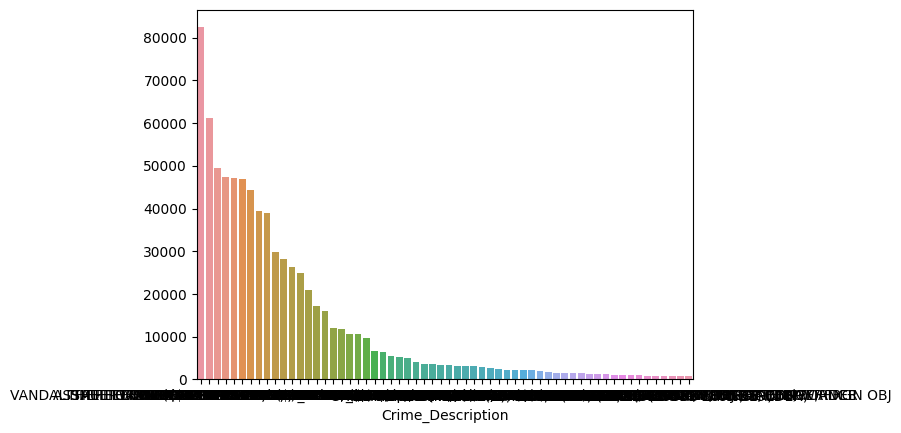

In [1796]:
sns.barplot(x = bn.index, y = bn.values)

### handling skewed values of 

In [1797]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Modcodes,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,0444 0913,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,0416 1822 1414,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,NaN,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,NaN,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",0413 1822 1262 1415,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),1402 2004 0344 0387,H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,1402 0392,NaN,POLICE FACILITY,NaN,946.0,Saturday,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1822 0344 1402,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",1300 0202 0378 0325,NaN,OTHER BUSINESS,NaN,341.0,Tuesday,May
